# Navigation

---

Solution is heavily based on course material and previous exercises.


### 1. Start the environment and load packacges


In [1]:
!pip -q install ./python # only needed for udacity workspace

In [2]:
#import some useful packages
from collections import deque
import time
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import torch

In [3]:
from unityagents import UnityEnvironment

# change to banana env path
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Define useful environment variables


In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)
state = env_info.vector_observations[0]
state_size = len(state)
print('States have length:', state_size)

Number of actions: 4
States have length: 37


### 3. Define DQN Agent

In [6]:
from dqn_agent import Agent
agent = Agent(state_size=state_size, action_size=action_size, seed=0)

In [7]:
def dqn(agent, num_episodes=10000, eps_start=1.0, eps_end=0.001, eps_decay=0.96, train=True):
    stepsize = 100
    scores = []                                          # initialize the score
    scores_window = deque(maxlen=stepsize)  # last X scores
    eps = eps_start                    # initialize epsilon


    start = time.time()        # set timer

    for i in range(1,num_episodes+1):
        score = 0                                          # initialize score
        env_info = env.reset(train_mode=train)[brain_name]  # reset env
        state = env_info.vector_observations[0]            # get initial state
        while True:
            action = agent.act(state, eps if train else 0.0) # select an action (greedy when not training)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            if train:
                agent.step(state, action, reward, next_state, done) # update agent (only when training)
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break
        scores.append(score)                               # append score
        scores_window.append(score)                        # append score to sliding window
        eps = max(eps_end, eps_decay*eps)                  # decrease epsilon

        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i, np.mean(scores_window)), end="")

        if i % stepsize == 0:
            stop = time.time() - start
            print('\rEpisode {}\tAverage Score: {:.2f} \tTime elapsed: {}'.format(i, np.mean(scores_window), int(stop)))
        
        if np.mean(scores_window)>=13.0 and train:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i-stepsize, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_dqn_success.pth')
            break
    return scores
    

### 4. Train Agent and plot scores

Training will be terminated as soon as agent manages to score +13 in 100 consecutive games. Agent model weights are saved under 'checkpoint_dqn_success.pth'. Training time ~1 second per episode (standard CPU / GPU).

In [8]:
scores = dqn(agent)

Episode 100	Average Score: 3.38 	Time elapsed: 113
Episode 200	Average Score: 9.42 	Time elapsed: 227
Episode 277	Average Score: 13.01
Environment solved in 177 episodes!	Average Score: 13.01


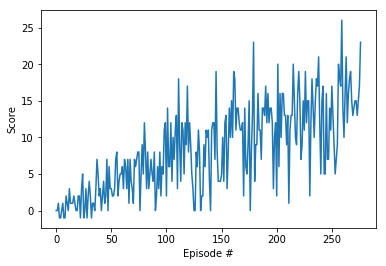

In [9]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [10]:
#close env
env.close()